#Importanto bibliotecas e dataset

In [913]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('./Customer_support_data.csv')

#Conhecendo o dataset

In [914]:
data.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [915]:
data.shape[0]

85907

In [916]:
data.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [917]:
data.dtypes

Unique id                   object
channel_name                object
category                    object
Sub-category                object
Customer Remarks            object
Order_id                    object
order_date_time             object
Issue_reported at           object
issue_responded             object
Survey_response_Date        object
Customer_City               object
Product_category            object
Item_price                 float64
connected_handling_time    float64
Agent_name                  object
Supervisor                  object
Manager                     object
Tenure Bucket               object
Agent Shift                 object
CSAT Score                   int64
dtype: object

In [918]:
data['category']

0        Product Queries
1        Product Queries
2          Order Related
3                Returns
4           Cancellation
              ...       
85902     Refund Related
85903      Order Related
85904      Order Related
85905           Feedback
85906            Returns
Name: category, Length: 85907, dtype: object

In [919]:
data.category.nunique()

12

In [920]:
data.category.value_counts().head(1).index[0]

'Returns'

In [921]:
data.category.value_counts().head()

category
Returns              44097
Order Related        23215
Refund Related        4550
Product Queries       3692
Shopzilla Related     2792
Name: count, dtype: int64

In [922]:
data['Sub-category']

0                      Life Insurance
1        Product Specific Information
2                   Installation/demo
3              Reverse Pickup Enquiry
4                          Not Needed
                     ...             
85902                  Refund Enquiry
85903          Seller Cancelled Order
85904            Order status enquiry
85905        UnProfessional Behaviour
85906          Reverse Pickup Enquiry
Name: Sub-category, Length: 85907, dtype: object

In [923]:
data['Sub-category'].nunique()

57

In [924]:
data['Sub-category'].value_counts().head()

Sub-category
Reverse Pickup Enquiry    22389
Return request             8523
Delayed                    7388
Order status enquiry       6922
Installation/demo          4116
Name: count, dtype: int64

In [925]:
data['channel_name']

0        Outcall
1        Outcall
2        Inbound
3        Inbound
4        Inbound
          ...   
85902    Inbound
85903    Inbound
85904    Inbound
85905    Inbound
85906    Inbound
Name: channel_name, Length: 85907, dtype: object

In [926]:
data.channel_name.nunique()

3

In [927]:
data.channel_name.value_counts().head()

channel_name
Inbound    68142
Outcall    14742
Email       3023
Name: count, dtype: int64

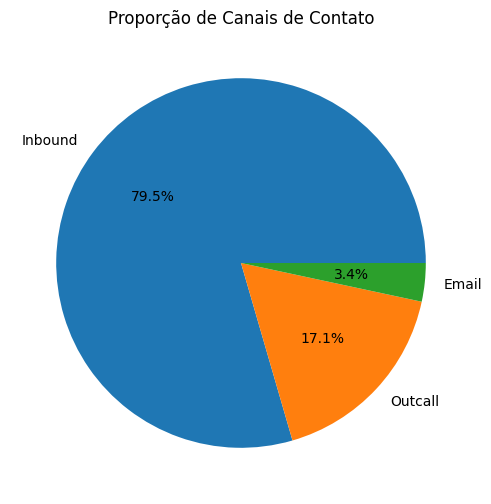

In [929]:
# Calcular a proporção de cada canal
channel_proportions = data_cleaned['channel_name'].value_counts(normalize=True)

# Criar gráfico de pizza
plt.figure(figsize=(8, 6))
channel_proportions.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporção de Canais de Contato')
plt.ylabel('')
plt.show()

In [928]:
data['Agent_name'].nunique()

1371

# 1. Higienização dos Dados

##1.1 Identificação de dados faltantes

In [930]:
data.isnull().sum()

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

As colunas com maior quantidade de dados faltantes são:

* Customer Remarks: 57,151 valores faltantes
* Order_id: 18,232 valores faltantes
* order_date_time: 68,693 valores faltantes
* Customer_City: 68,828 valores faltantes
* Product_category: 68,711 valores faltantes
* Item_price: 68,701 valores faltantes
* connected_handling_time: 85,665 valores faltantes

##1.2 Tratamento de dados faltantes ou inconsistentes

In [931]:
data_cleaned = data.dropna(subset=['CSAT Score'])

Tipos de Dados Ajustados:

* order_date_time
* Issue_reported at
* issue_responded
* Survey_response_Date

##1.3 Verificação da integridade dos dados

In [932]:
data_cleaned['order_date_time'] = pd.to_datetime(data_cleaned['order_date_time'], errors='coerce')
data_cleaned['Issue_reported at'] = pd.to_datetime(data_cleaned['Issue_reported at'], format='%d/%m/%Y %H:%M', errors='coerce')
data_cleaned['issue_responded'] = pd.to_datetime(data_cleaned['issue_responded'], format='%d/%m/%Y %H:%M', errors='coerce')
data_cleaned['Survey_response_Date'] = pd.to_datetime(data_cleaned['Survey_response_Date'], format='%d-%b-%y', errors='coerce')


<ipython-input-932-6180b7ceeba7>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_cleaned['order_date_time'] = pd.to_datetime(data_cleaned['order_date_time'], errors='coerce')


##1.4 Exibir as primeiras linhas após a higienização

In [933]:
# Convert 'issue_responded' and 'Issue_reported at' to datetime if they aren't already
data_cleaned['issue_responded'] = pd.to_datetime(data_cleaned['issue_responded'])
data_cleaned['Issue_reported at'] = pd.to_datetime(data_cleaned['Issue_reported at'])
data_cleaned['handling_time'] = data_cleaned['issue_responded'] - data_cleaned['Issue_reported at']
data_cleaned['handling_time_min'] = data_cleaned['handling_time'].dt.total_seconds() / 60

# Drop specified columns
data_cleaned = data_cleaned.drop(['Unique id','Customer Remarks', 'Order_id', 'order_date_time','Item_price', 'Survey_response_Date', 'Customer_City','Product_category', 'connected_handling_time','Issue_reported at', 'issue_responded', 'handling_time'], axis=1)

data_cleaned.head()

,channel_name,category,Sub-category,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,handling_time_min
0,Outcall,Product Queries,Life Insurance,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,34.0
1,Outcall,Product Queries,Product Specific Information,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,2.0
2,Inbound,Order Related,Installation/demo,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,22.0
3,Inbound,Returns,Reverse Pickup Enquiry,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,20.0
4,Inbound,Cancellation,Not Needed,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,2.0


##1.5 Identificaçãqo de Outliers

###CSAT Score

<Axes: xlabel='CSAT Score'>

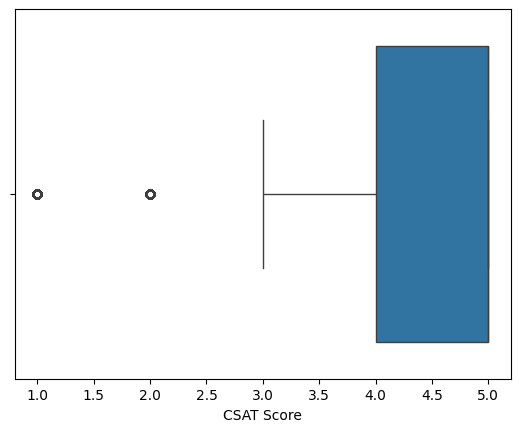

In [934]:
sns.boxplot(x=data_cleaned['CSAT Score'])

In [935]:
from scipy import stats
z_scores = stats.zscore(data_cleaned['CSAT Score'])
outliers = data_cleaned[(z_scores > 3) | (z_scores < -3)]

In [936]:
# Substituição de outliers pela mediana
median_csat = data_cleaned['CSAT Score'].median()
data_cleaned['CSAT Score'] = np.where((z_scores > 3) | (z_scores < -3), median_csat, data_cleaned['CSAT Score'])

<Axes: xlabel='CSAT Score'>

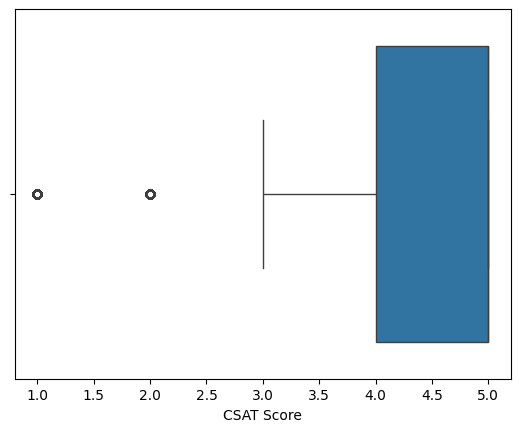

In [937]:
sns.boxplot(x=data_cleaned['CSAT Score'])

### Handling time

<Axes: xlabel='handling_time_min'>

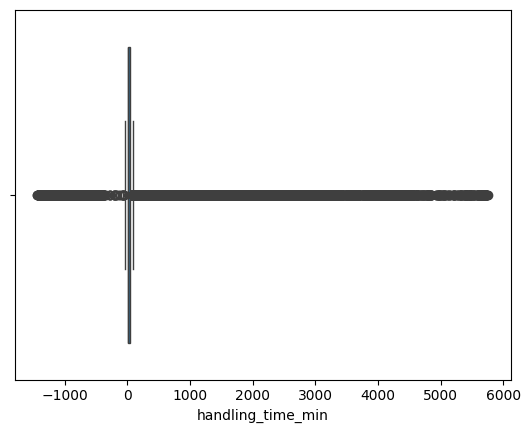

In [938]:
sns.boxplot(x=data_cleaned['handling_time_min'])

In [939]:
z_scores = stats.zscore(data_cleaned['handling_time_min'])
outliers = data_cleaned[(z_scores > 3) | (z_scores < -3)]

In [940]:
Q1 = data_cleaned['handling_time_min'].quantile(0.25)
Q3 = data_cleaned['handling_time_min'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data_cleaned[(data_cleaned['handling_time_min'] < lower_bound) | (data_cleaned['handling_time_min'] > upper_bound)]

In [941]:
data_cleaned = data_cleaned[~((data_cleaned['handling_time_min'] < lower_bound) | (data_cleaned['handling_time_min'] > upper_bound))] # Using IQR

In [942]:
from scipy.stats.mstats import winsorize
data_cleaned['handling_time_min'] = winsorize(data_cleaned['handling_time_min'], limits=[0.05, 0.05])

<ipython-input-942-ba6aaeb2d0fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['handling_time_min'] = winsorize(data_cleaned['handling_time_min'], limits=[0.05, 0.05])


<Axes: xlabel='handling_time_min'>

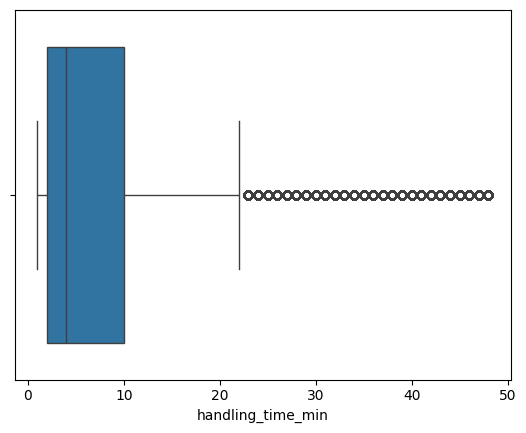

In [943]:
sns.boxplot(x=data_cleaned['handling_time_min'])

#2. Análise dos Dados

##2.1 Estatísticas descritivas das pontuações de CSAT

In [944]:
csat_stats = data_cleaned['CSAT Score'].describe()
print(csat_stats)

count    66648.000000
mean         4.346762
std          1.284088
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: CSAT Score, dtype: float64


##2.2 Análise de categorias e subcategorias de interação

In [945]:
category_analysis = data_cleaned.groupby(['category'])['CSAT Score'].mean()
category_analysis

category
App/website           4.650794
Cancellation          4.153986
Feedback              4.318694
Offers & Cashback     4.324251
Onboarding related    4.352941
Order Related         4.210308
Others                3.393939
Payments related      4.420076
Product Queries       4.103989
Refund Related        4.343429
Returns               4.445650
Shopzilla Related     4.383220
Name: CSAT Score, dtype: float64

In [946]:
sub_category_analysis = data_cleaned.groupby(['Sub-category'])['CSAT Score'].mean()
sub_category_analysis

Sub-category
Account updation                    3.974359
Affiliate Offers                    4.205882
App/website Related                 4.714286
Billing Related                     4.765957
COD Refund Details                  4.014706
Call back request                   3.531250
Call disconnected                   2.960000
Card/EMI                            4.142857
Commission related                  2.333333
Customer Requested Modifications    4.585875
Damaged                             4.651297
Delayed                             4.182142
Exchange / Replacement              4.169670
Fraudulent User                     4.682990
General Enquiry                     4.287282
Installation/demo                   4.015961
Instant discount                    4.671875
Invoice request                     4.504065
Issues with Shopzilla App           4.642857
Life Insurance                      4.500000
Missing                             4.671522
Not Needed                          4.1022

* Categorias como Returns e subcategorias como Damaged e Fraudulent User têm altas pontuações de CSAT.
* Outras subcategorias como Service Center - Service Denial e Unable to Login têm pontuações mais baixas.

##2.3 Análise de handling_time_min

In [947]:
handling_time_stats = data_cleaned['handling_time_min'].describe()
print(handling_time_stats)

count    66648.000000
mean         9.457313
std         12.706781
min          1.000000
25%          2.000000
50%          4.000000
75%         10.000000
max         48.000000
Name: handling_time_min, dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [948]:
handling_time_analysis = data_cleaned.groupby(['handling_time_min'])['CSAT Score'].mean()
handling_time_analysis

handling_time_min
1.0     4.501043
2.0     4.515222
3.0     4.482854
4.0     4.444321
5.0     4.399577
6.0     4.354403
7.0     4.341336
8.0     4.283029
9.0     4.277367
10.0    4.216447
11.0    4.144954
12.0    4.160000
13.0    4.163391
14.0    4.164690
15.0    4.085106
16.0    4.025729
17.0    3.952297
18.0    4.113553
19.0    4.010040
20.0    3.970917
21.0    3.909091
22.0    3.904393
23.0    3.941019
24.0    4.213873
25.0    4.080537
26.0    4.079861
27.0    3.949495
28.0    4.033557
29.0    4.118110
30.0    4.109434
31.0    3.970339
32.0    3.931915
33.0    4.107843
34.0    3.946188
35.0    3.884615
36.0    4.023697
37.0    3.969231
38.0    3.972973
39.0    4.029412
40.0    3.937107
41.0    4.086486
42.0    3.861789
43.0    4.027027
44.0    4.083333
45.0    3.770833
46.0    3.956522
47.0    3.942857
48.0    3.965885
Name: CSAT Score, dtype: float64

##2.4 Desempenho dos agentes

In [949]:
agent_performance = data_cleaned.groupby('Agent_name')['CSAT Score'].mean()
agent_performance_ranked = agent_performance.sort_values(ascending=False)
print(agent_performance_ranked)

Agent_name
Timothy Bailey        4.961538
Pamela Robinson       4.944444
William Munoz         4.937500
Allison Wheeler       4.928571
Mark Gonzalez         4.916667
                        ...   
Curtis Mccarthy       2.263158
Charles Morales       2.227273
Virginia Mccormick    2.043478
Rebecca Miller        1.777778
Philip Harmon         1.571429
Name: CSAT Score, Length: 1371, dtype: float64


In [950]:
agent_performance_time = data_cleaned.groupby('Agent_name')['handling_time_min'].mean()
agent_performance__time_ranked = agent_performance.sort_values(ascending=True)
print(agent_performance_ranked)

Agent_name
Timothy Bailey        4.961538
Pamela Robinson       4.944444
William Munoz         4.937500
Allison Wheeler       4.928571
Mark Gonzalez         4.916667
                        ...   
Curtis Mccarthy       2.263158
Charles Morales       2.227273
Virginia Mccormick    2.043478
Rebecca Miller        1.777778
Philip Harmon         1.571429
Name: CSAT Score, Length: 1371, dtype: float64


##2.5 Desempenho do período de categorização do agente

In [951]:
tenure_bucket_performance = data_cleaned.groupby('Tenure Bucket')['CSAT Score'].mean()
tenure_bucket_performance_ranked = tenure_bucket_performance.sort_values(ascending=False)
print(tenure_bucket_performance_ranked)

Tenure Bucket
61-90              4.464917
31-60              4.400384
>90                4.383569
0-30               4.371096
On Job Training    4.231411
Name: CSAT Score, dtype: float64


##2.6 Desempenho da equipe de cada supervisor

In [952]:
supervisor_team_performance = data_cleaned.groupby('Supervisor')['CSAT Score'].mean()
supervisor_team_ranked = supervisor_team_performance.sort_values(ascending=False)
print(supervisor_team_ranked)

Supervisor
Landon Tanaka       4.516387
Sophia Sato         4.477896
Elijah Yamaguchi    4.477821
Nathan Patel        4.473970
William Park        4.458200
Logan Lee           4.457819
Brayden Wong        4.449093
Isabella Wong       4.446707
Ethan Nakamura      4.443925
Olivia Wang         4.438968
Lily Chen           4.438011
Noah Patel          4.406597
Amelia Tanaka       4.401742
Madison Kim         4.389995
Aiden Patel         4.385558
Wyatt Kim           4.383107
Abigail Suzuki      4.373821
Mia Patel           4.370726
Scarlett Chen       4.367689
Layla Taniguchi     4.361702
Carter Park         4.349985
Evelyn Kimura       4.344311
Emily Yamashita     4.314739
Alexander Tanaka    4.309970
Lucas Singh         4.295643
Jackson Park        4.288212
Ethan Tan           4.287464
Olivia Suzuki       4.273217
Mason Gupta         4.256915
Ava Wong            4.256518
Jacob Sato          4.251712
Harper Wong         4.204790
Mia Yamamoto        4.199134
Emma Park           4.189828
Aus

##2.7 Desempenho da equipe de cada gerente

In [953]:
manager_team_performance = data_cleaned.groupby('Manager')['CSAT Score'].mean()
manager_team_ranked = manager_team_performance.sort_values(ascending=False)
print(manager_team_ranked)

Manager
Emily Chen         4.484570
John Smith         4.383107
Michael Lee        4.374148
Jennifer Nguyen    4.246681
Olivia Tan         4.207681
William Kim        4.199320
Name: CSAT Score, dtype: float64


##2.8 Visualização das distribuições
Distribuição das pontuações de CSAT, a performance por categoria/subcategoria, e a performance dos agentes.

### Distribuição das Pontuações de CSAT





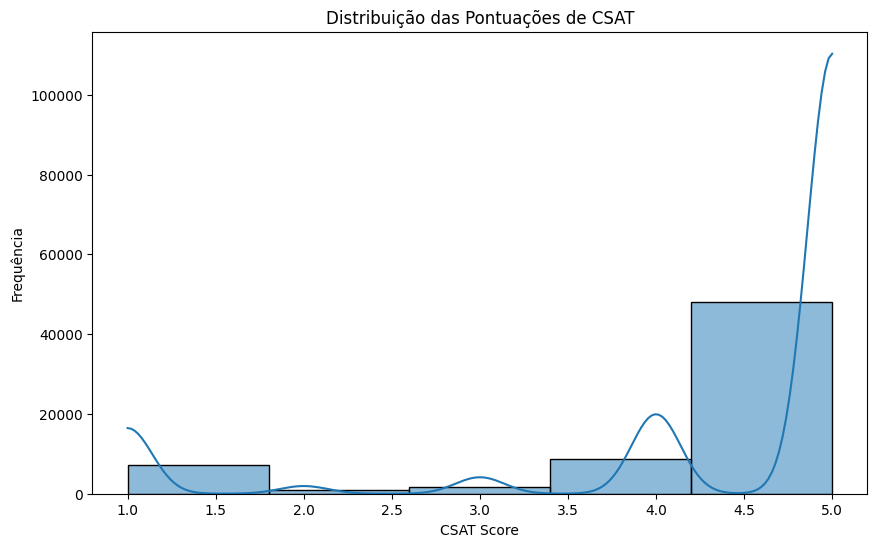

In [954]:
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['CSAT Score'], bins=5, kde=True)
plt.title('Distribuição das Pontuações de CSAT')
plt.xlabel('CSAT Score')
plt.ylabel('Frequência')
plt.show()

* A distribuição das pontuações de CSAT mostra que a maioria das pontuações está concentrada em torno dos valores mais altos (4 e 5), indicando uma alta satisfação geral dos clientes.

###Performance por Categoria

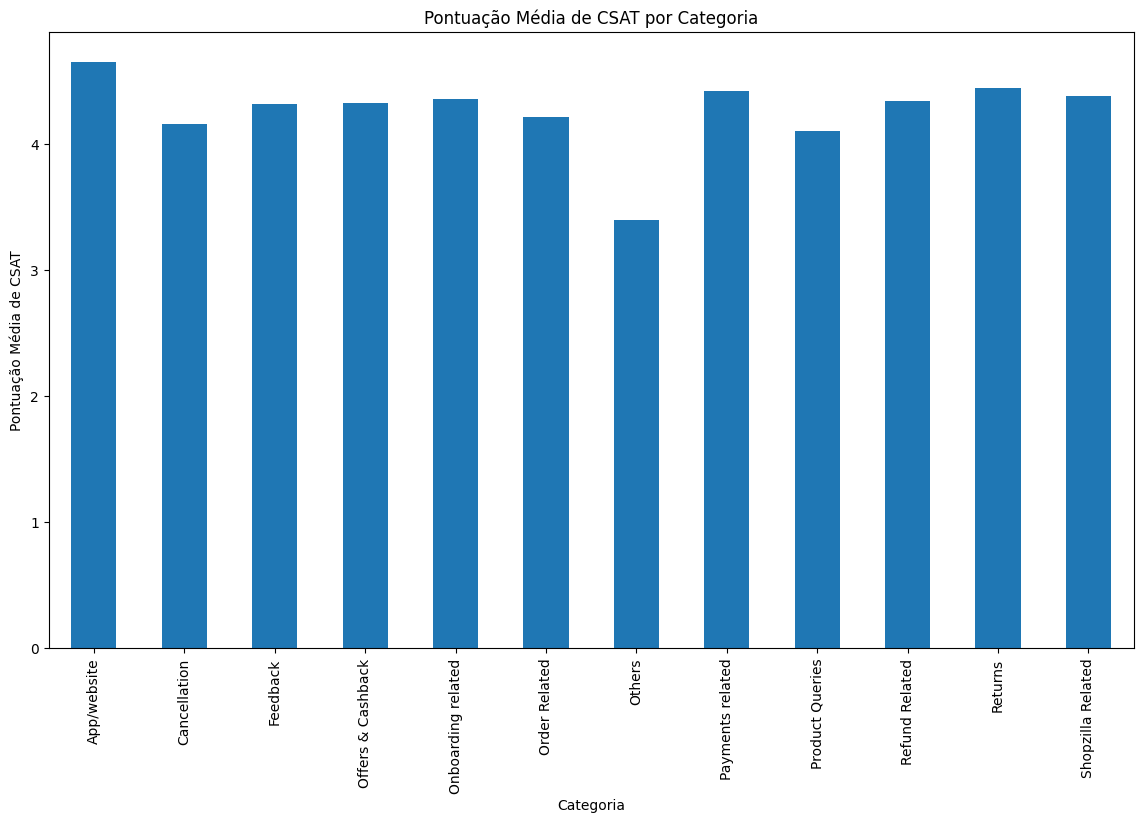

In [955]:
plt.figure(figsize=(14, 8))
category_analysis.plot(kind='bar')
plt.title('Pontuação Média de CSAT por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Pontuação Média de CSAT')
plt.xticks(rotation=90)
plt.show()


* A visualização das pontuações médias de CSAT por categoria e subcategoria revela que algumas subcategorias, como Damaged e Fraudulent User na categoria Returns, têm pontuações altas, enquanto subcategorias como Service Center - Service Denial têm pontuações mais baixas.

###Performance por Sub-categoria

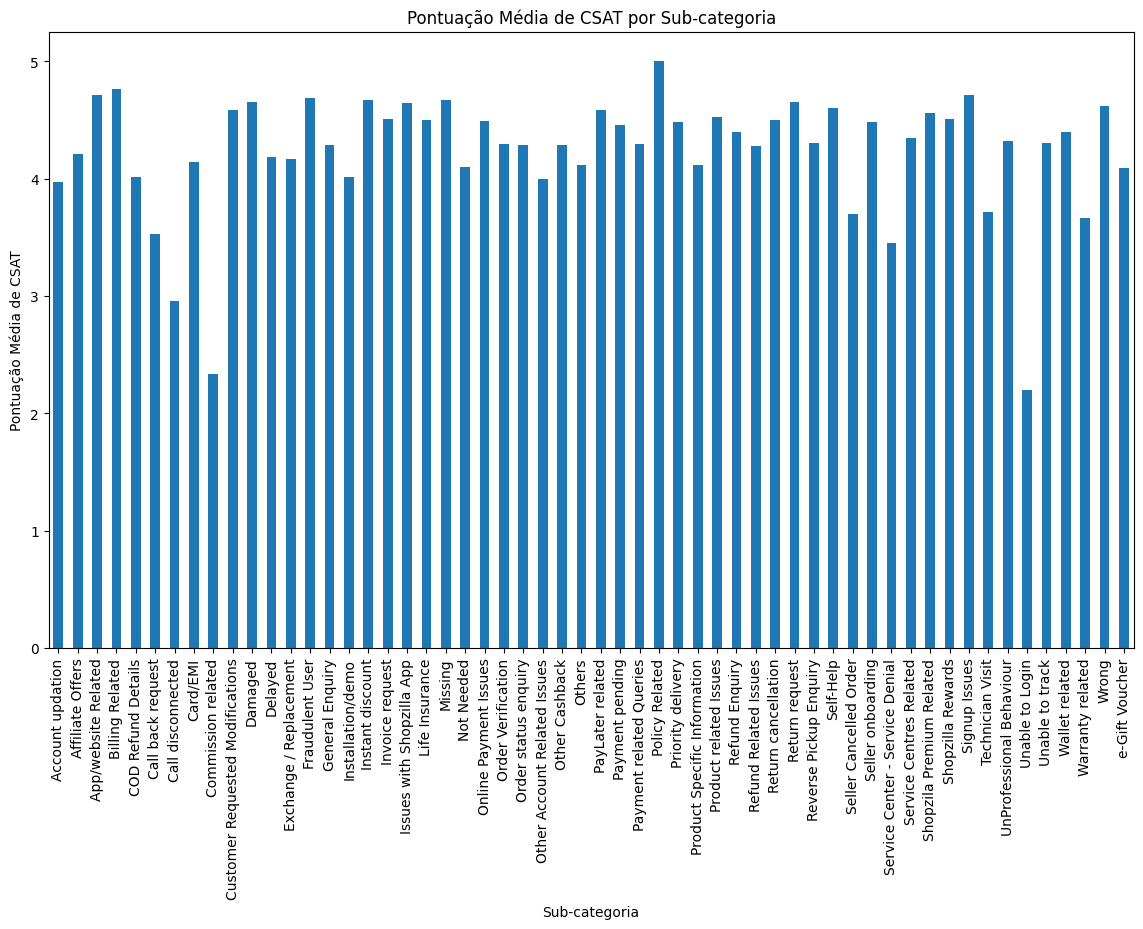

In [956]:
plt.figure(figsize=(14, 8))
sub_category_analysis.plot(kind='bar')
plt.title('Pontuação Média de CSAT por Sub-categoria')
plt.xlabel('Sub-categoria')
plt.ylabel('Pontuação Média de CSAT')
plt.xticks(rotation=90)
plt.show()

###TempoxNota

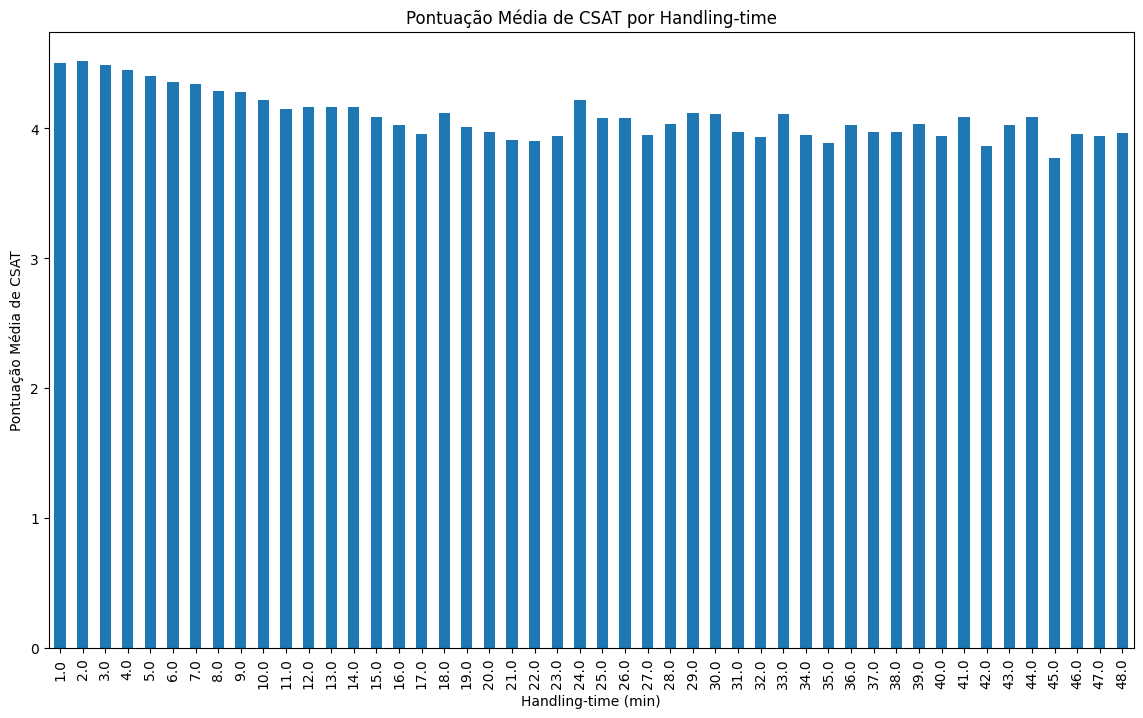

In [957]:
plt.figure(figsize=(14, 8))
handling_time_analysis.plot(kind='bar')
plt.title('Pontuação Média de CSAT por Handling-time')
plt.xlabel('Handling-time (min)')
plt.ylabel('Pontuação Média de CSAT')
plt.xticks(rotation=90)
plt.show()

###Performance dos Agentes

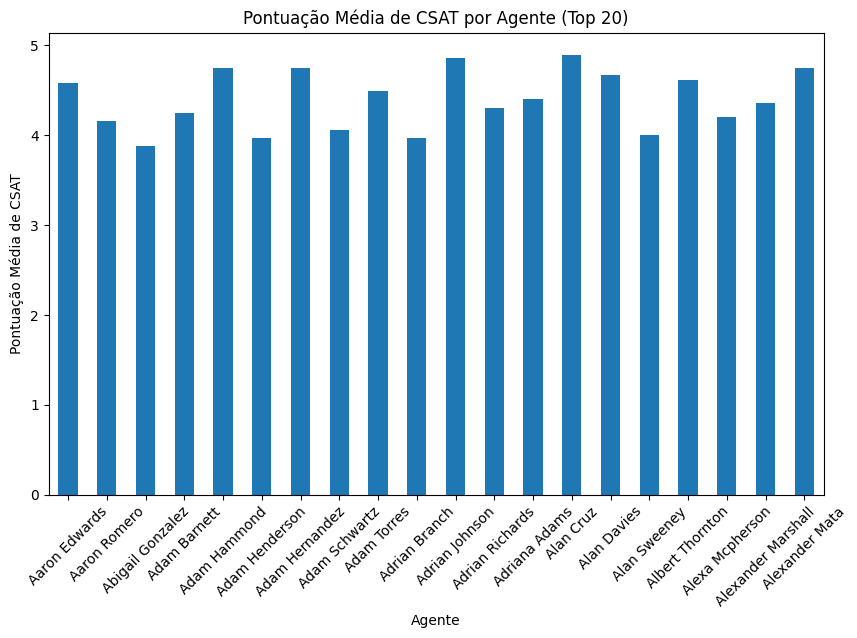

In [958]:
plt.figure(figsize=(10, 6))
agent_performance.head(20).plot(kind='bar')
plt.title('Pontuação Média de CSAT por Agente (Top 20)')
plt.xlabel('Agente')
plt.ylabel('Pontuação Média de CSAT')
plt.xticks(rotation=45)
plt.show()

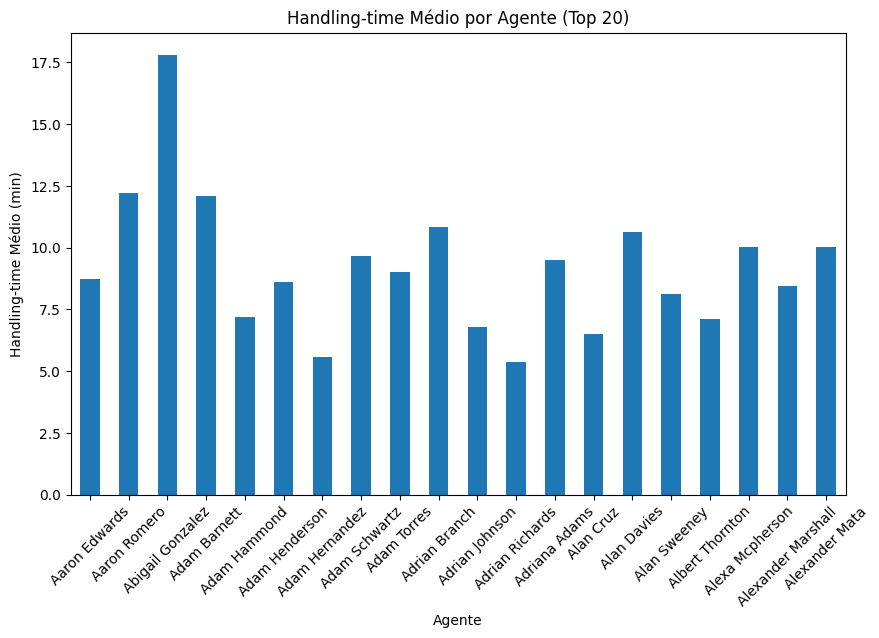

In [959]:
plt.figure(figsize=(10, 6))
agent_performance_time.head(20).plot(kind='bar')
plt.title('Handling-time Médio por Agente (Top 20)')
plt.xlabel('Agente')
plt.ylabel('Handling-time Médio (min)')
plt.xticks(rotation=45)
plt.show()

###Performance por Período de categorização do agente

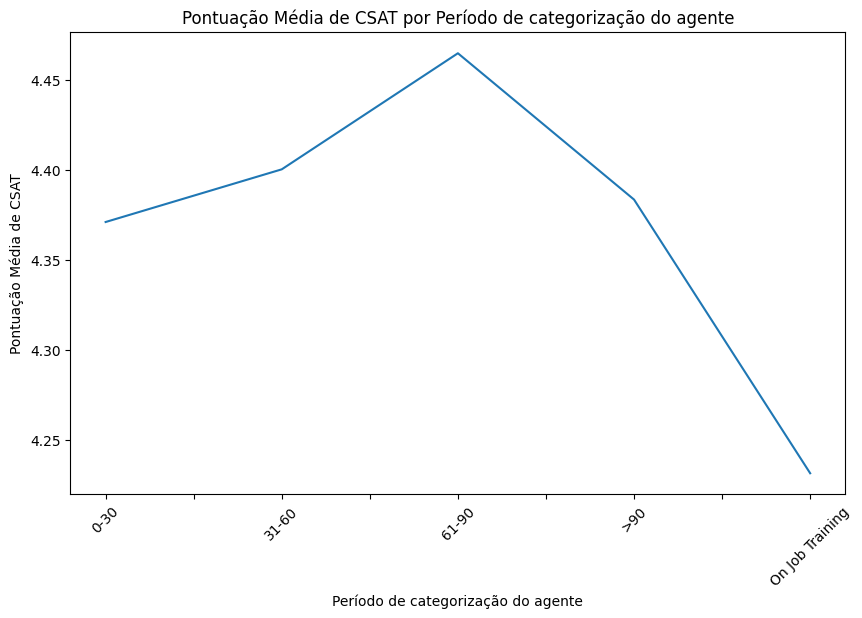

In [960]:
plt.figure(figsize=(10, 6))
tenure_bucket_performance.plot(kind='line')
plt.title('Pontuação Média de CSAT por Período de categorização do agente')
plt.xlabel('Período de categorização do agente')
plt.ylabel('Pontuação Média de CSAT')
plt.xticks(rotation=45)
plt.show()

##2.5 Análise de Correlação:
Correlação entre diferentes variáveis e a pontuação de CSAT para identificar fatores que impactam a satisfação do cliente.

###Calcular a matriz de correlação (com Categorias)

In [965]:
# Import necessary library
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(data_cleaned[['channel_name', 'category',]])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame.sparse.from_spmatrix(encoded_data, columns=encoder.get_feature_names_out(['channel_name', 'category']))

# Concatenate the encoded data with the numerical column'
numerical_data = data_cleaned[['CSAT Score', 'handling_time_min']]
data_encoded = pd.concat([numerical_data, encoded_df], axis=1)

# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()

# Display the correlation matrix
print(correlation_matrix)

                             CSAT Score  handling_time_min  \
CSAT Score                     1.000000          -0.136897   
handling_time_min             -0.136897           1.000000   
channel_name_Email             0.004340          -0.004793   
channel_name_Inbound          -0.001369          -0.001943   
channel_name_Outcall          -0.000599           0.004360   
category_App/website          -0.000708           0.006264   
category_Cancellation          0.001144           0.000959   
category_Feedback              0.001879          -0.007650   
category_Offers & Cashback     0.001895           0.000749   
category_Onboarding related    0.002338          -0.007237   
category_Order Related         0.001614           0.001601   
category_Others                0.004617          -0.006337   
category_Payments related      0.003895           0.003005   
category_Product Queries       0.007970           0.005569   
category_Refund Related       -0.003532           0.001544   
category

###Visualizar a matriz de correlação

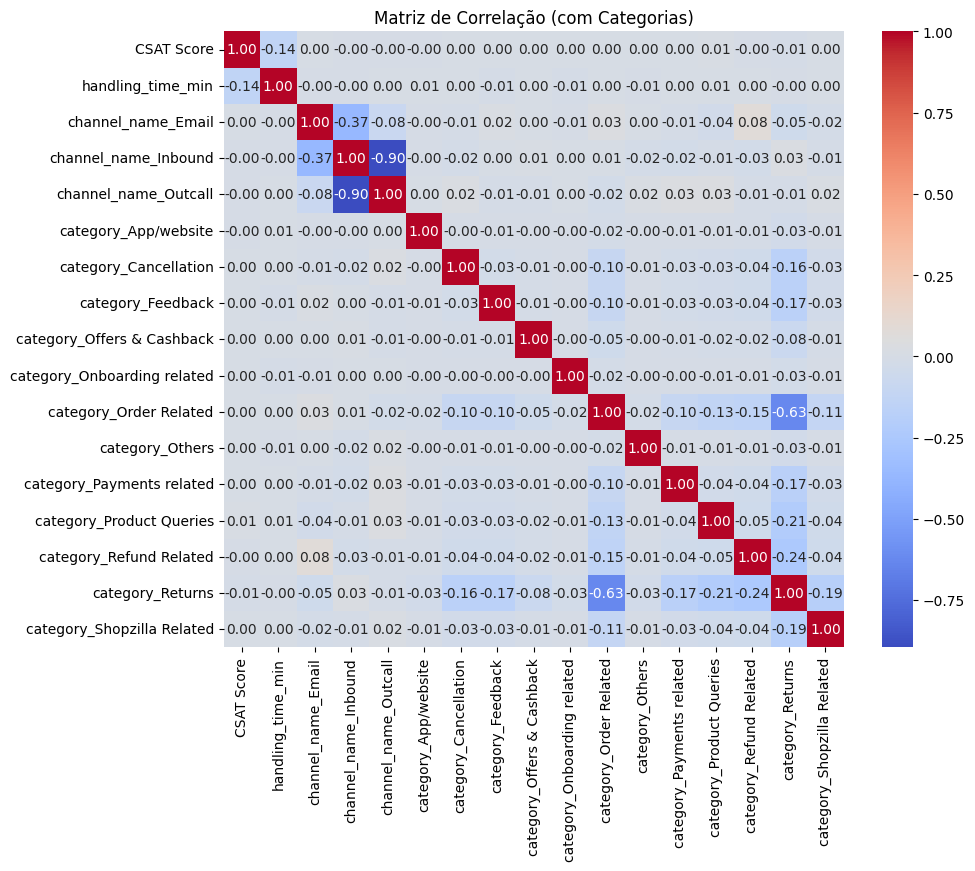

In [966]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação (com Categorias)')
plt.show()

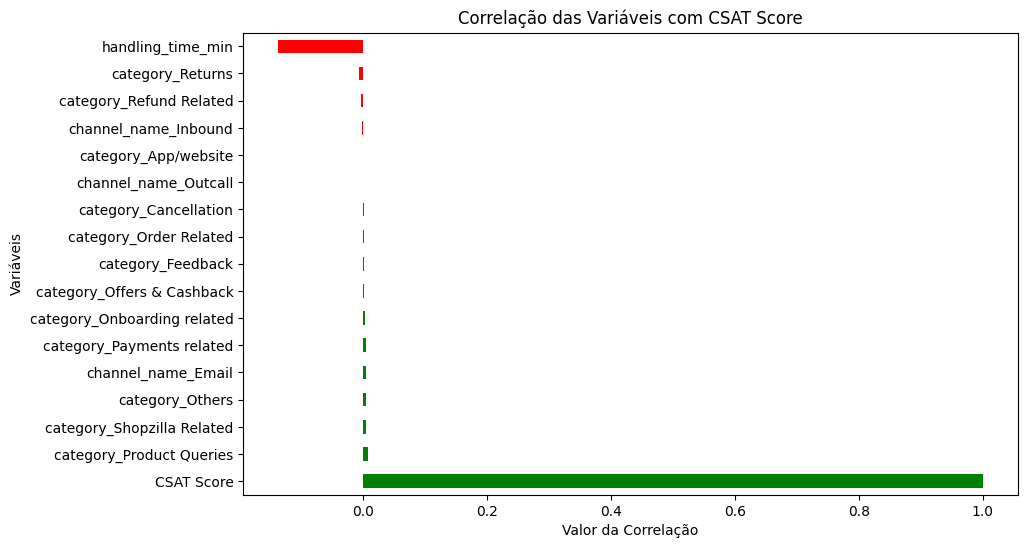

In [905]:
# Filtrar correlações com CSAT Score
correlation_with_csat = correlation_matrix['CSAT Score'].sort_values(ascending=False)

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
correlation_with_csat.plot(kind='barh', color=(correlation_with_csat > 0).map({True: 'g', False: 'r'}))
plt.title('Correlação das Variáveis com CSAT Score')
plt.xlabel('Valor da Correlação')
plt.ylabel('Variáveis')
plt.show()

###Calcular a matriz de correlação (com sub-categorias)

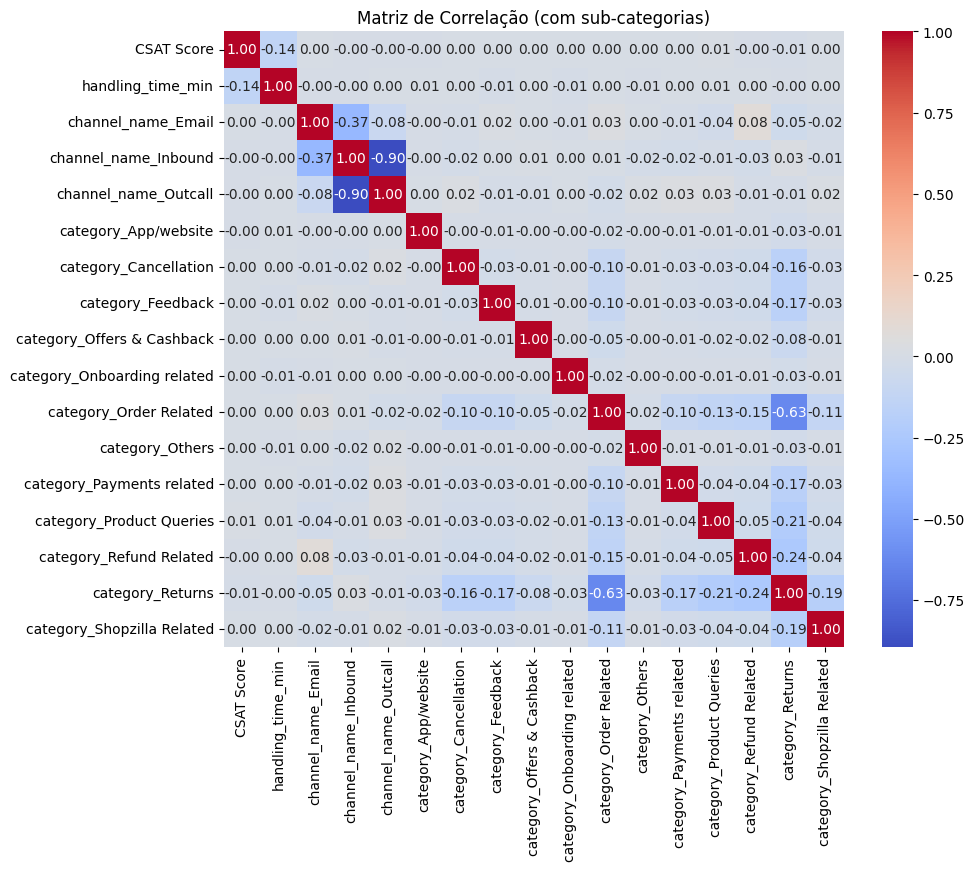

In [909]:
# Fit and transform the categorical columns
encoded_data_2 = encoder.fit_transform(data_cleaned[['channel_name', 'Sub-category']])

# Create a DataFrame from the encoded data
encoded_df_2 = pd.DataFrame.sparse.from_spmatrix(encoded_data_2, columns=encoder.get_feature_names_out(['channel_name', 'Sub-category']))

# Concatenate the encoded data with the numerical column'
numerical_data_2 = data_cleaned[['CSAT Score', 'handling_time_min']]
data_encoded_2 = pd.concat([numerical_data_2, encoded_df_2], axis=1)

# Calculate the correlation matrix
correlation_matrix_2 = data_encoded_2.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação (com sub-categorias)')
plt.show()

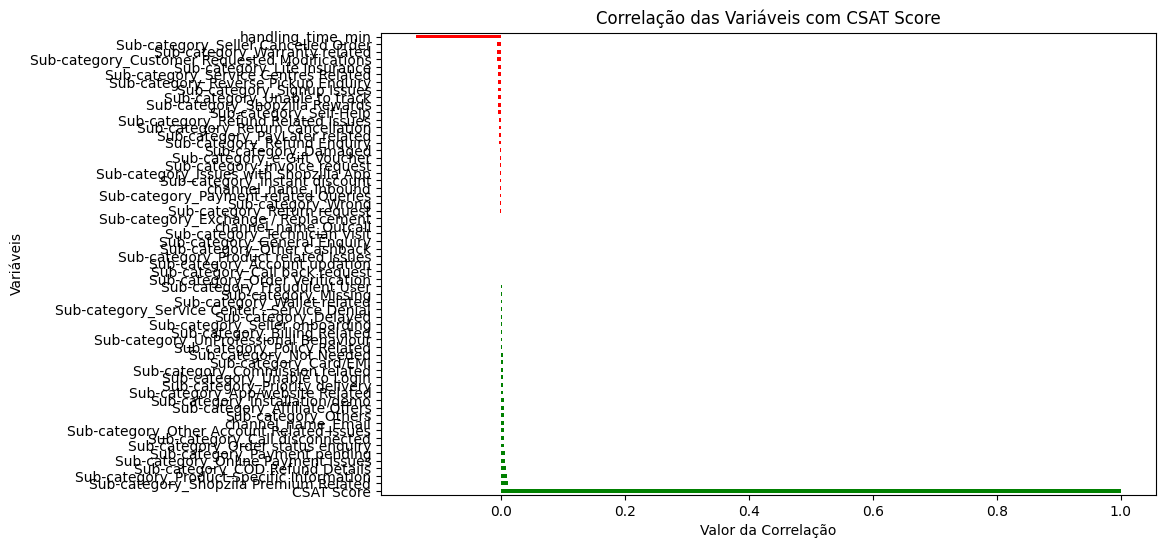

In [910]:
# Filtrar correlações com CSAT Score
correlation_with_csat_2 = correlation_matrix_2['CSAT Score'].sort_values(ascending=False)

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
correlation_with_csat_2.plot(kind='barh', color=(correlation_with_csat_2 > 0).map({True: 'g', False: 'r'}))
plt.title('Correlação das Variáveis com CSAT Score')
plt.xlabel('Valor da Correlação')
plt.ylabel('Variáveis')
plt.show()

##3. Testes de hipótese

###CSAT e Canal de Atendimento (ANOVA):

In [975]:
import statsmodels.formula.api as sm
from statsmodels.stats import anova

# Criar um modelo de ANOVA
model = sm.ols('Q("CSAT Score") ~ C(channel_name)', data=data_cleaned).fit()

# Realizar o teste ANOVA
anova_table = anova.anova_lm(model, typ=2) # Use anova.anova_lm

# Imprimir a tabela ANOVA
print(anova_table)


                        sum_sq       df          F        PR(>F)
C(channel_name)     176.349118      2.0  53.559733  5.727661e-24
Residual         109716.632142  66645.0        NaN           NaN


###CSAT e Categoria do Problema (Kruskal-Wallis):

In [977]:
from scipy.stats import kruskal

# Separar os dados por categoria
categorias = data_cleaned['category'].unique()

# Access the correct column name (replace 'CSAT Score' with the actual name)
grupos = [data_cleaned['CSAT Score'][data_cleaned['category'] == cat] for cat in categorias]

# Realizar o teste Kruskal-Wallis
statistic, p_value = kruskal(*grupos)

# Imprimir o resultado
print(f"Estatística do teste: {statistic}")
print(f"Valor p: {p_value}")

Estatística do teste: 562.9477570749486
Valor p: 1.1695974656453412e-113


###Tempo de Atendimento e CSAT (Regressão Linear Simples):

In [980]:
import statsmodels.api as sm

# Criar um modelo de regressão linear
X = data_cleaned['handling_time_min']
# Assuming 'CSAT Score' is the actual column name
y = data_cleaned['CSAT Score']  # Change this line to the correct column name
X = sm.add_constant(X)  # Adicionar uma constante ao modelo
model = sm.OLS(y, X).fit()

# Imprimir o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             CSAT Score   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1273.
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          3.66e-276
Time:                        04:21:28   Log-Likelihood:            -1.1060e+05
No. Observations:               66648   AIC:                         2.212e+05
Df Residuals:                   66646   BIC:                         2.212e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.4776      0.00